In [19]:
import sys
sys.path.append('../')
sys.path.append('../splinedistm')

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from csbdeep.utils import normalize
from glob import glob
from skimage import io
from splinedist.models import SplineDist2D
from stardist.matching import matching_dataset
from tqdm import tqdm

from utils import save_scores_csv, show_test_images, taus

In [11]:
image_dir = f'/storage/annajiwons/images'
merfish_dir = f'{image_dir}/merfish'

model_dir = './models'

In [12]:
# 8 images (20%) chosen for test
merfish_X_test_names = sorted(glob(f'{merfish_dir}/test/images/*.tif'))
merfish_X_test = [normalize(img, 1, 99.8, axis=(0, 1)) for img in list(map(io.imread, merfish_X_test_names))]
merfish_Y_test_names = sorted(glob(f'{merfish_dir}/test/masks/*.tif'))
merfish_Y_test = list(map(io.imread, merfish_Y_test_names))

In [13]:
# Load from disk
splinedist_merfish_model = SplineDist2D(None, name='splinedist_merfish', basedir=model_dir)

Loading network weights from 'weights_best.h5'.
Couldn't load thresholds from 'thresholds.json', using default values. (Call 'optimize_thresholds' to change that.)
Using default values: prob_thresh=0.5, nms_thresh=0.4.


In [14]:
merfish_Y_pred = [splinedist_merfish_model.predict_instances(x, n_tiles=splinedist_merfish_model._guess_n_tiles(x), show_tile_progress=False)
              for x in tqdm(merfish_X_test)]

100%|██████████| 8/8 [06:47<00:00, 50.94s/it]


In [15]:
merfish_Y_pred_labels = [pred[0] for pred in merfish_Y_pred]
merfish_stats = [matching_dataset(merfish_Y_test, merfish_Y_pred_labels, thresh=t, show_progress=False) for t in tqdm(taus)]

100%|██████████| 9/9 [00:34<00:00,  3.82s/it]


In [16]:
merfish_stats

[DatasetMatching(criterion='iou', thresh=0.1, fp=2, tp=42, fn=1, precision=0.9545454545454546, recall=0.9767441860465116, accuracy=0.9333333333333333, f1=0.9655172413793104, n_true=43, n_pred=44, mean_true_score=0.7392137898171331, mean_matched_score=0.7568141181461125, panoptic_quality=0.7307170795893501, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.2, fp=2, tp=42, fn=1, precision=0.9545454545454546, recall=0.9767441860465116, accuracy=0.9333333333333333, f1=0.9655172413793104, n_true=43, n_pred=44, mean_true_score=0.7392137898171331, mean_matched_score=0.7568141181461125, panoptic_quality=0.7307170795893501, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.3, fp=2, tp=42, fn=1, precision=0.9545454545454546, recall=0.9767441860465116, accuracy=0.9333333333333333, f1=0.9655172413793104, n_true=43, n_pred=44, mean_true_score=0.7392137898171331, mean_matched_score=0.7568141181461125, panoptic_quality=0.7307170795893501, by_image=False),
 DatasetMatching(criterio

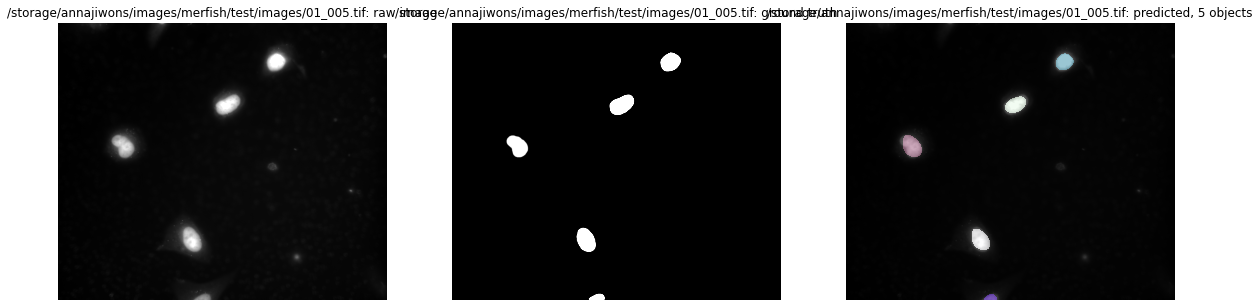

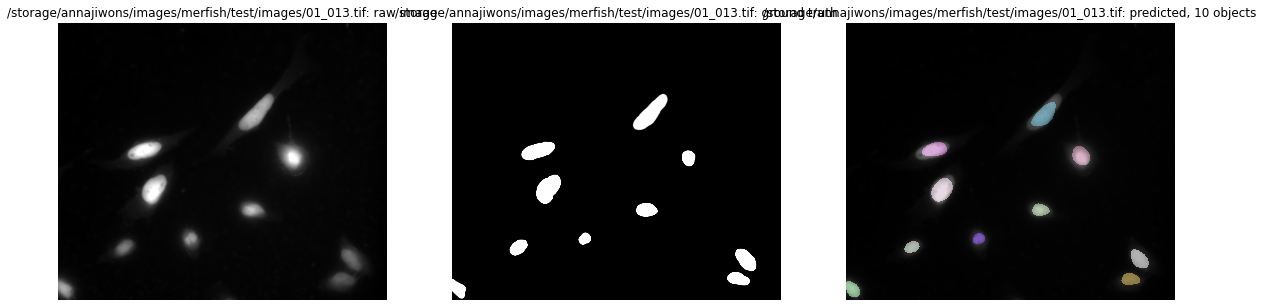

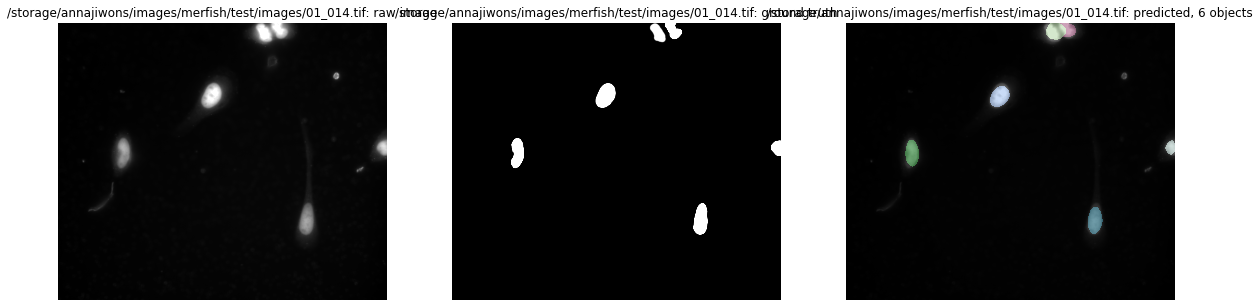

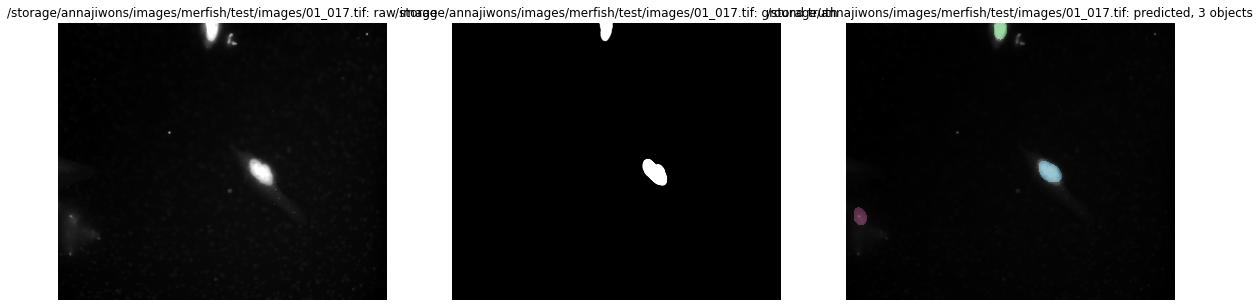

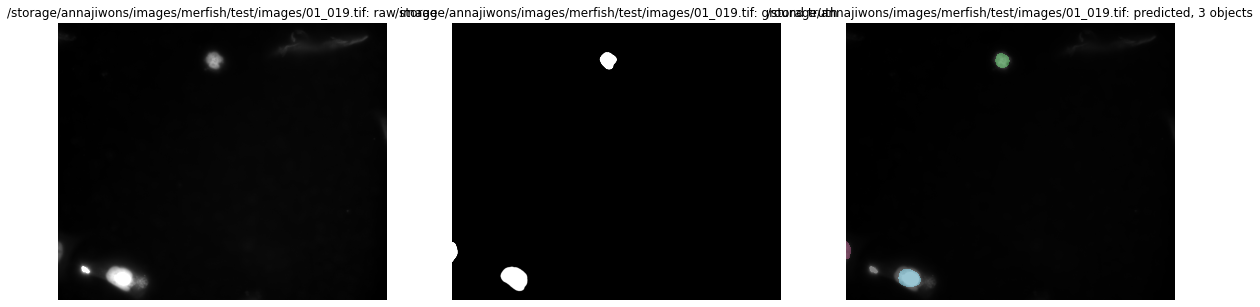

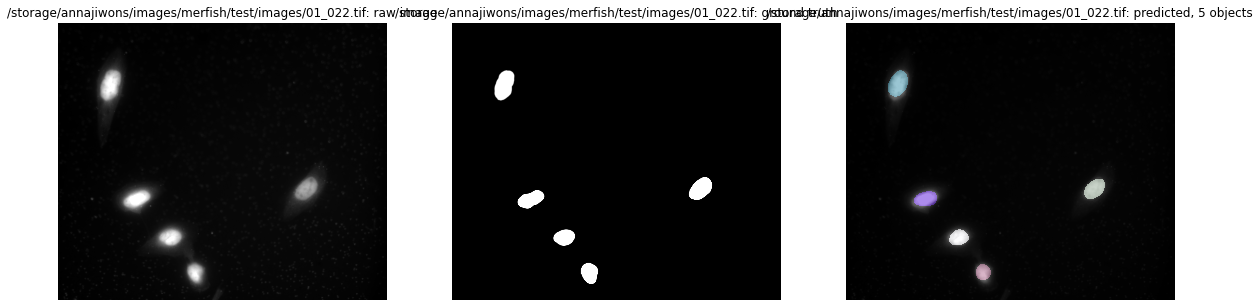

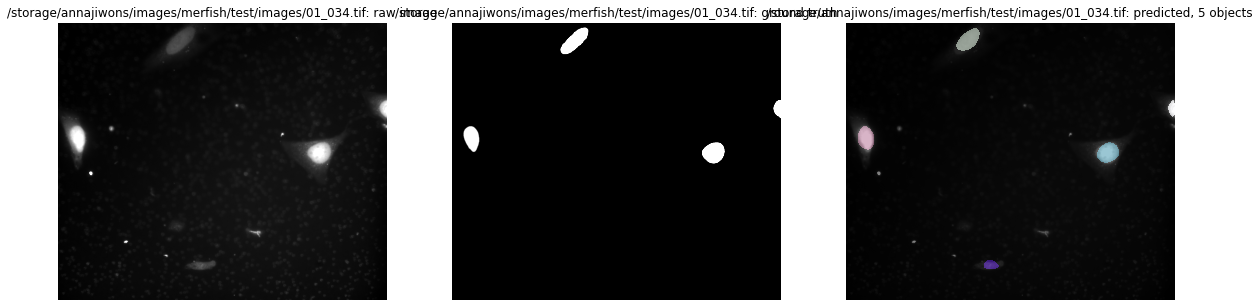

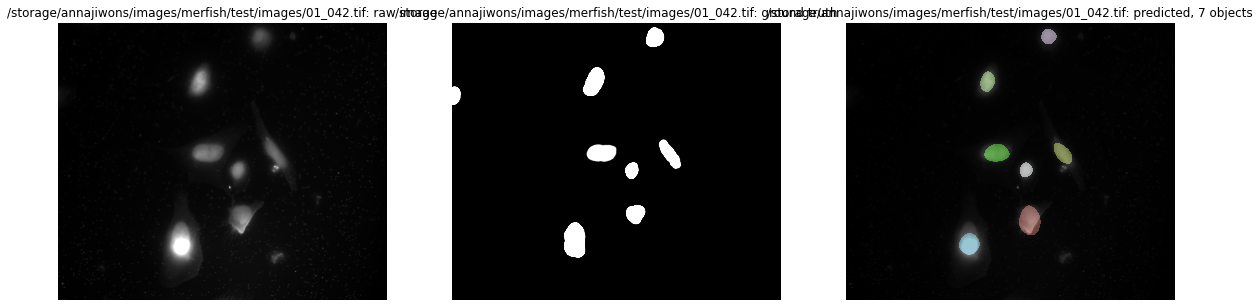

In [17]:
show_test_images(merfish_X_test, merfish_Y_test, merfish_Y_pred, merfish_X_test_names)

In [18]:
save_scores_csv(merfish_stats)

In [20]:
cv.imwrite('model13.tif', merfish_Y_pred[1][0])

True